# День второй - анализ данных

В сегодняшнем дне мы погрузимся в аналитику данных как таковую, и нас ждут следующие блоки:
- библиотеки работы с данными numpy, pandas, pyplot, seaborn, ipywidgets,
- понятие разведочного анализа и предобработки признаков. поймем, почему нельзя полагаться только на выборочные статистики как числа,
- линейные модели и градиентный спуск,
- деревья решений и ансамбли моделей на основе деревьев решений,
- алгоритм ближайших соседей и соседство как таковое (весьма важно на практике),
- (пока) поверхностно: нейронные сети в библиотеке `scikit-learn`.

## 2.1 Библиотеки работы с данными
### Библиотеки numpy и pandas

Библиотека `numpy` предназначена для работы с многомерными массивами. Мы уже видели примеры в первом дне, как ей можно пользоваться, теперь чуть-чуть поподробнее на примерах.

In [1]:
import numpy as np # общепринятое сокращение

# создадим первый numpy-массив.
# каждый элемент первого уровня содержит другой массив... 
# второй уровень - числа

array = np.array([[1, 2,], [3, 4]])
array

array([[1, 2],
       [3, 4]])

In [2]:
# с массивами numpy можно проделывать различные операции одновременно надо всеми элементами

# в квадрат и минус 1
array ** 2 - 1

array([[ 0,  3],
       [ 8, 15]], dtype=int32)

In [3]:
# все массивы numpy должны иметь одинаковый тип элементов

array.dtype, array.astype(float).dtype

(dtype('int32'), dtype('float64'))

In [4]:
# библиотека numpy содержит множество полезных функций

np.log(np.e), np.allclose(0, np.sin(np.pi))

(1.0, True)

In [5]:
# массивы numpy можно индексировать вот так

# первая строка, вторая колонка
array[0, 1]

2

In [6]:
# вся вторая колонка
array[:, 1], "эквивалентно", array[None:None, 1]

(array([2, 4]), 'эквивалентно', array([2, 4]))

In [7]:
# есть полезные операции над массивами, например среднее

# среднее по всем элементам, среднее по каждому столбцу (по вертикали), среднее по каждой строке (по горизонтали)
array.mean(), array.mean(axis=0), array.mean(axis=1)

(2.5, array([2., 3.]), array([1.5, 3.5]))

In [8]:
# преобразовать размерность массива
# - первое - чтобы была одна колонка
# - второе - чтобы была одна строка

array.reshape(-1, 1), array.reshape(1, -1)

(array([[1],
        [2],
        [3],
        [4]]), array([[1, 2, 3, 4]]))

Нам часто будет нужен метод `.reshape`, так как он может полезен при конвертации данных в массивы, пригодные для обучения моделей. Если на одной какой-то оси стоит -1, то количество элементов на ней будет рассчитано автоматически. Так например, `.reshape(-1, number_of_features)` - сделает массив с количеством примеров, каждая строка которога - список признаков.

По сути, массивы `numpy` - это те же "числа", с точки зрения операций. Однако благодаря еще наличию в них структуры - набор этих операций шире.

Далее. Библиотека `pandas` в свою очередь предназначена для работы с табличными данными, и колонки таблицы могут иметь разный тип. Давайте рассмотрим датасет, на котором мы будем дальше часто тренироваться - датасет `Abalone` (ракушки).

Это датасет физических замеров ракушек, с различными признаками. Нужно предсказывать возраст ракушки по физическим параметрам. Делается это путем подсчета колец, но это достаточно долгая и нудная процедура, причем с применением микроскопа - да и ракушку надо пилить. Добавив 1.5 к количеству колец (зависит правда от локации) - обычно получают возраст.

Мы будем по-разному формулировать задачи с этим датасетом, но пока это неважно. Давайте на него посмотрим.

In [9]:
# подключим pandas с общепринятым сокращением
import pandas as pd

dataframe = pd.read_csv(
    'data/abalone.csv', 
    sep=',', # что является разделителем колонок в файле,
    decimal='.', # что является разделителем десятичных дробей в записи чисел
    parse_dates=[], # мы знаем, что дат у нас нет, если бы они были, здесь можно было бы перечислить колонки
    header=0 # названия колонок в первой строке
)

# посмотрим на случайные 15 записей
dataframe.sample(15)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
1374,M,0.615,0.480,0.175,1.1180,0.4460,0.3195,0.3000,9
3345,F,0.480,0.380,0.145,0.5900,0.2320,0.1410,0.2300,12
3724,F,0.485,0.365,0.150,0.9145,0.4145,0.1990,0.2730,7
1110,I,0.520,0.380,0.135,0.5395,0.2295,0.1330,0.1570,8
1598,I,0.530,0.400,0.145,0.5550,0.1935,0.1305,0.1950,9
3584,M,0.625,0.490,0.165,1.1835,0.5170,0.2375,0.3900,11
3538,M,0.435,0.335,0.110,0.4385,0.2075,0.0715,0.1315,7
1056,I,0.200,0.155,0.040,0.0435,0.0155,0.0090,0.0070,4
255,M,0.560,0.450,0.175,1.0110,0.3835,0.2065,0.3700,15
2256,M,0.520,0.380,0.135,0.5825,0.2505,0.1565,0.1750,8


Здесь у нас есть поля пола (M - мужской, F - женский и I - дети), есть поля длины, диаметра, высоты - в мм, четыре разных веса (полный и веса по составляющим) в граммах, и количество колец (целое число).

Давайте посмотрим, как можно работать с такой таблицей.

In [10]:
# описательные статистики для числовых полей

dataframe.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# количество ракушек разных полов

dataframe.groupby('sex')['rings'].count()

sex
F    1307
I    1342
M    1528
Name: rings, dtype: int64

In [12]:
# количество ракушек по полам, в случае если диаметр ракушки больше среднего

dataframe[dataframe.diameter > dataframe.diameter.mean()].groupby('sex')['rings'].count()

sex
F     988
I     256
M    1070
Name: rings, dtype: int64

Уже сейчас по числам видно, что маленький диаметр ракушки - это преимущественно дети.

In [13]:
# срез данных по колонкам и строкам
# первая и последние колонки и последние три строки

dataframe[['sex', 'rings']][-3:]

,sex,rings
4174,M,9
4175,F,10
4176,M,12


In [14]:
# сортировка датасета - и посмотрим максимальный
# .values - это получить колонку как numpy-массив

dataframe.sort_values('rings').rings.values[-1] # ракушка-старожил

29

In [15]:
# каждый датафрейм (объект таблицы) имеет индекс

dataframe.index[:4:2], dataframe.loc[dataframe.index[:4:2]][dataframe.columns[:3]]

(RangeIndex(start=0, stop=4, step=2),   sex  length  diameter
 0   M   0.455     0.365
 2   F   0.530     0.420)

Таблицы `pandas` можно так же склеивать (по горизонтали и вертикали), делать агрегированные (сводные) таблицы, и многое другое. Если того, что описано здесь недостаточно, обращайтесь к преподавателям или к Google :)

### Библиотеки визуализации

Мы посмотрим на две - первая это `matplotlib` - универсальная, вторая, это надстройка над ней под названием `seaborn` - очень удобная для визуализации в статистических исследованиях.

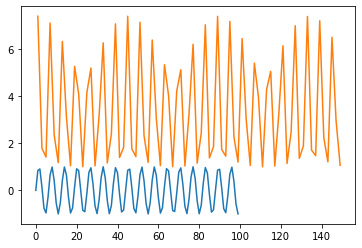

In [16]:
%matplotlib inline
# важная строка, если надо чтобы диаграммы выводились в тетрадке

import matplotlib.pyplot as plt # тоже общепринятое сокращение

# наша первая линейная диаграмма
plt.plot(np.sin(range(100))); # точка с запятой нужна, чтобы не выводить в тетрадку запись об объекте

# наша вторая диаграмма, она наложится
plt.plot(range(1, 151, 2), np.exp(np.cos(range(0, 150, 2)) + 1));

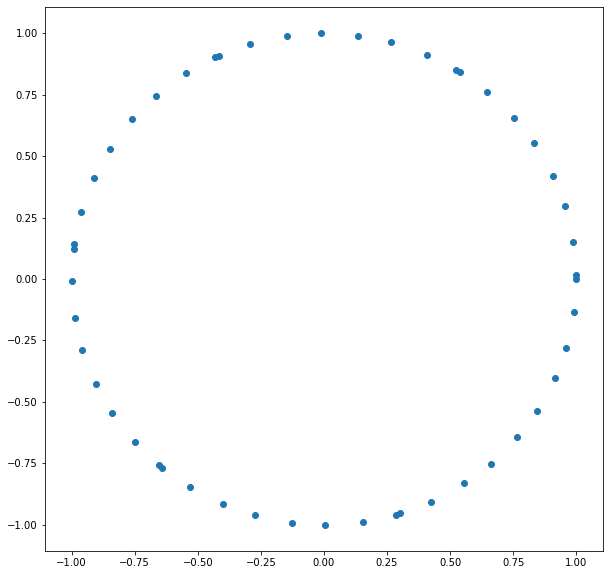

In [17]:
# на тот случай, если мы хотим изображение больше
plt.figure(figsize=(10, 10)) # длина и высота. ... в дюймах!

# точечная диаграмма
plt.scatter(np.cos(range(50)), np.sin(range(50)));

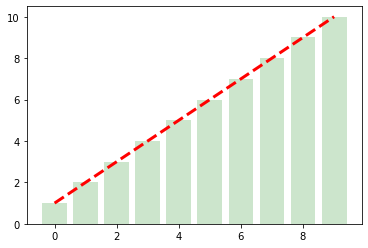

In [18]:
# диаграммы можно накладывать друг на друга - даже когда они разных типов

plt.bar(
    range(10), # значения на оси абсцис
    np.linspace(1, 10, 10), # высота столбцов
    color='green', # понятно, цвет
    alpha=0.2 # прозрачность
);

plt.plot(
    range(10), # значения x
    np.linspace(1, 10, 10), # значения y
    color='red', # тут тоже понятно
    ls='--', # стиль линии
    lw=3 # ширина линии
);

Библиотека `seaborn` содержит очень много полезных способов визуализации данных, лучше всего их посмотреть в галерее библиотеки. Нас же будут интересовать три:
1. Как построить график распределения какой-либо величины,
2. График попарных точечных диаграмм,
3. График серий.

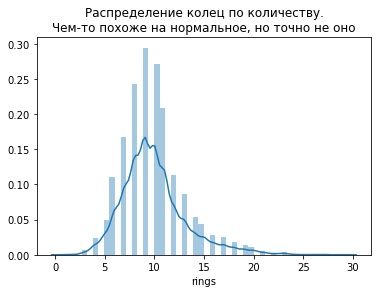

In [19]:
# посмотрим на распределение колец ракушек
import seaborn as sns

plt.title("Распределение колец по количеству.\nЧем-то похоже на нормальное, но точно не оно")
sns.distplot(dataframe.rings);

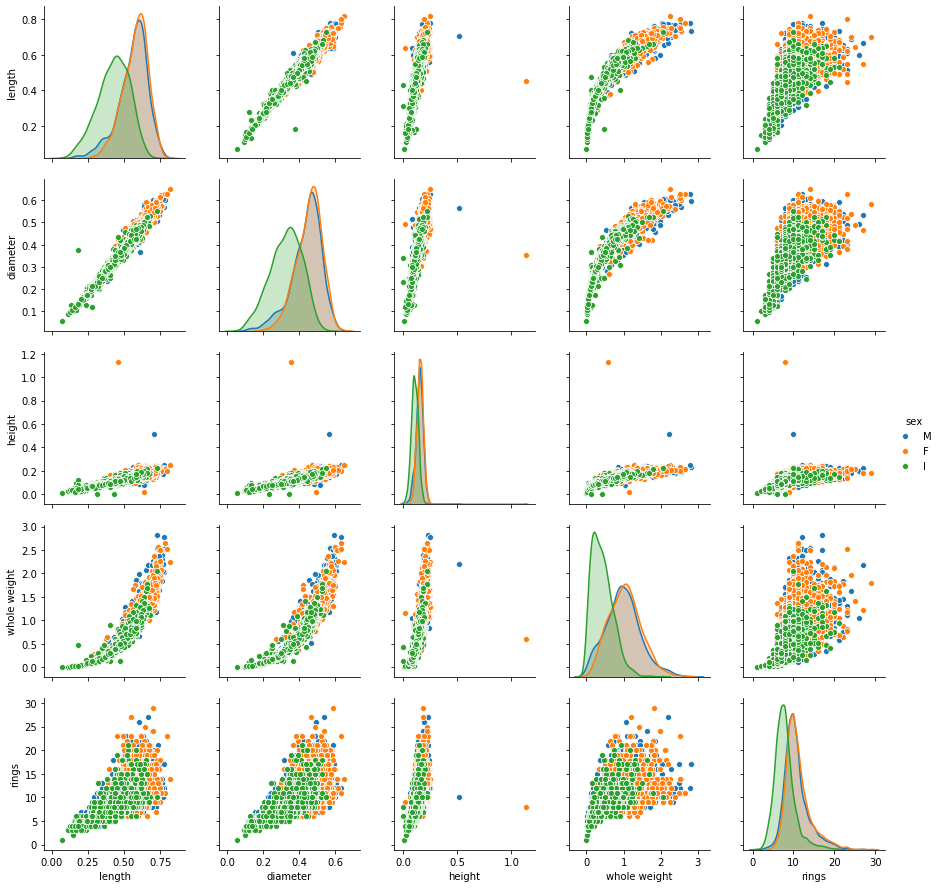

In [20]:
# попарные точечных диаграммы

sns.pairplot(data=dataframe[['length', 'diameter', 'height', 'whole weight', 'rings', 'sex']], hue='sex');

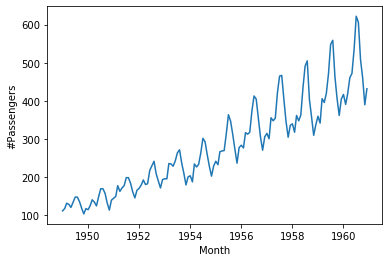

In [21]:
# и наконец, диаграмма серий (пример с датами)

airpassengers = pd.read_csv('data/airpassengers.csv', parse_dates=['Month'])
sns.lineplot(x="Month", y="#Passengers", data=airpassengers);

### А теперь - интерактив!

Досточно легко сделаем наши диаграммы интерактивными в ноутбуках с помощью `ipywidgets`.

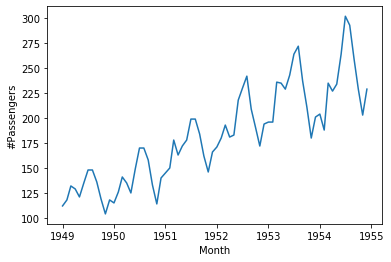

In [22]:
from ipywidgets import interact

def draw_function(length):
    sns.lineplot(x="Month", y="#Passengers", data=airpassengers[:length]);
    
interact(
    draw_function,
    length=(
        12, # минимальное значение
        len(airpassengers), # максимальное
        12 # шаг
    )
);

В библиотеке `ipywidgets` много всяких полезностей, тем не менее подробно мы на них не будем останавливаться. Метод `interact` автоматически распознаёт тип переменной, и подставит - для строки поле ввода текста, для числа с плавающей запятой - слайдер, и так далее.

## 2.2 Разведочный анализ и пропроцессинг признаков

Разведочный анализ, или *понимание данных* - важный этап, который может сократить большое количество времени. Давайте сразу посмотрим на квартет Энскомба (Anscombe's quartet). Это четыре набора данных, каждый из которых линейно аппроксимируется одинаково.

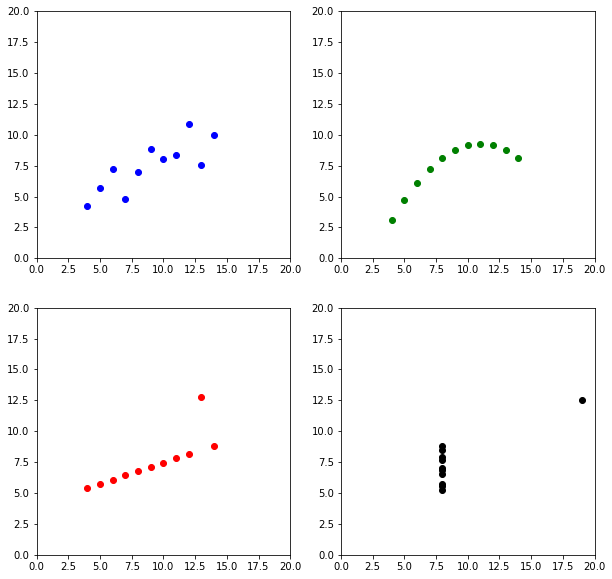

In [23]:
quartet = pd.read_csv('data/anscombes.csv').drop('id', axis='columns')

plt.figure(figsize=(10, 10))
for index, dataset in enumerate(['I', 'II', 'III', 'IV']):
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        quartet[quartet.dataset == dataset].x,
        quartet[quartet.dataset == dataset].y,
        c=['blue', 'green', 'red', 'black'][index]
    );
    plt.xlim(0, 20);
    plt.ylim(0, 20);

Это четыре разных датасета, но посмотрим их статистики.

In [24]:
quartet.groupby('dataset').describe().T 

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

> Как видим, количество, среднее и разброс у всех наборов одинаковый! В частности, линейные алгоритмы только на это и полагаются. Поэтому очень ВАЖНО смотреть попарные диаграмми **глазами**. 

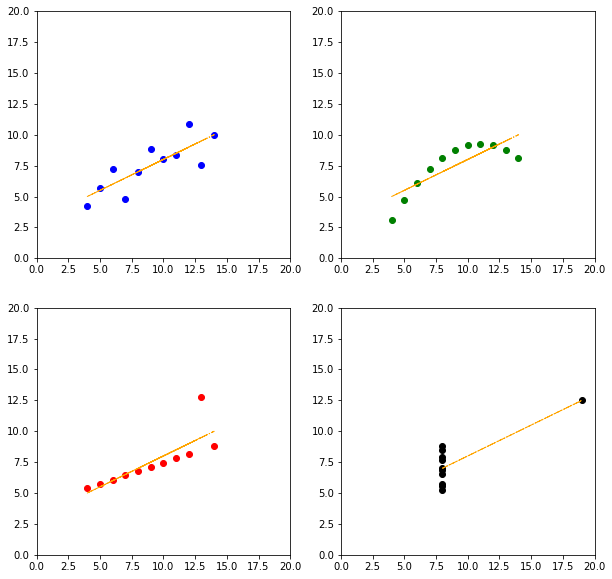

In [25]:
from sklearn.linear_model import LinearRegression

coefs = []

plt.figure(figsize=(10, 10))
for index, dataset in enumerate(['I', 'II', 'III', 'IV']):
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        quartet[quartet.dataset == dataset].x,
        quartet[quartet.dataset == dataset].y,
        c=['blue', 'green', 'red', 'black'][index]
    );
    model = LinearRegression().fit(
        quartet[quartet.dataset == dataset].x.values.reshape(-1, 1),
        quartet[quartet.dataset == dataset].y
    ) # y = kx + b
    coefs.append([
        model.coef_[0], # это k
        model.intercept_ # это b
    ])
    line = model.predict(quartet[
        quartet.dataset == dataset
    ].x.values.reshape(-1, 1))
    plt.plot(
        quartet[quartet.dataset == dataset].x,
        line,
        ls='-.',
        c='orange',
        lw=1
    )
    plt.xlim(0, 20);
    plt.ylim(0, 20);

In [26]:
np.array(coefs)[:, 0], np.array(coefs)[:, 1]

(array([0.50009091, 0.5       , 0.49972727, 0.49990909]),
 array([3.00009091, 3.00090909, 3.00245455, 3.00172727]))

**Коэффициенты практически одинаковые**.

Так что же представляет собой разведочный анализ? Давайте остановися на том, что это не просто подсчет описательных статистик (сколько, среднее, разраброс), но и построение диаграмм, на которых можно уловить какие-то зависимости, возможно даже глазами.

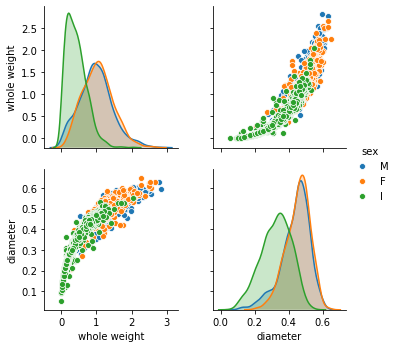

In [27]:
sns.pairplot(dataframe[['whole weight', 'diameter', 'sex']], hue='sex');

Здесь (для примера) мы видим некоторую изогнутую зависимость между весом ракушки и её диаметром. Может она степенная? Мы можем предположить, что извлечение квадратного корня "исправит ситуацию", и может превратить зависимость в линейную. Проверим хотя бы визуально, без метрик.

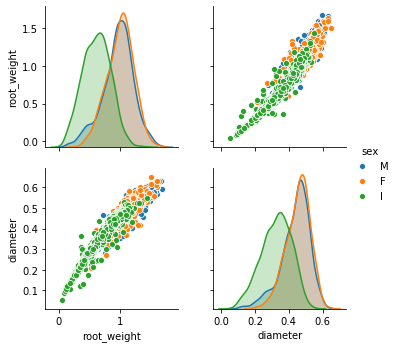

In [28]:
dataframe_copy = dataframe.copy()
dataframe_copy['root_weight'] = np.sqrt(dataframe_copy['whole weight'])
sns.pairplot(dataframe_copy[['root_weight', 'diameter', 'sex']], hue='sex');

Как видим, мы слегка "выпрямили" зависимость, хотя и не до конца (это означает что степень на самом деле еще меньше одной второй). А то, что мы процедурно сделали, называется `feature engineering` - преобразование признаков, с целью подогнать данные под линейную модель (которая хорошо работает с прямолинейными зависимостями).

Препроцессинг - это в свою очередь преобразование данных в вид, который признаёт алгоритм, и обычно это двумерный массив (матрица) значений, где каждая строка - пример, а значения строки - значения признаков. 

В случае с квартетом Энскомба мы этого достигли преобразованием `.reshape(-1, 1)`, где количество признаков это `1`, а `-1` - это количество примеров (мы могли подставить туда их точное количество, но для одной оси в `reshape` можно поставить и -1, тогда оно само подсчитается).

Препроцессинг этим не ограничивается. Что если мы хотим использовать *категориальный* признак? Например, пол ракушки? Алгоритмы ничего кроме чисел не понимают. Поэтомы мы должны привести их к числам, но не просто по порядку - порядок полов в данных же не важен, а *векторизовать*.

То есть мужскому полу сопоставить вектор `(1, 0, 0)`, женскому `(0, 1, 0)`, а детскому соответственно `(0, 0, 1)`, и вместо одного признака для модели, у нас будет их три.

In [29]:
# всё это можно сделать функцией pandas get_dummies

processed_data = pd.get_dummies(dataframe['sex'])
processed_data.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [30]:
# чтобы склеить по индексу, можно использовать такой код
number_data = processed_data.join(dataframe).drop('sex', axis='columns')
number_data.head()

,F,I,M,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


И теперь у нас готовые численные данные, которые можно отдавать в алгоритмы. А какие - об этом прямо сейчас.

# 2.3 Линейные модели и градиентный спуск

Линейные модели просты и интерпретируемы, и поэтому чрезвычайно распространены. И при подходящей предобработке признаков - весьма универсальны. Отклик по линейному алгоритму моделируется как линейная комбинация признаков с некоторыми коэффициентами и плюс сдвиг:

`y = k1 * x1 + k2 * x2 + ... + km * xm + b`

Всё. Нет, не всё. Существует аналитическое решение (то есть формульно), как найти `k1 ... km, b` такие, чтобы ошибка (конкретно среднее квадратичное отклонение модели от данных) было минимальным. Мы же для целей иллюстрации рассмотрим алгоритм *градиентного спуска*, который применяется во множестве моделях, нейросетях в частности.

Смысл всего этого такой. Чтобы найти минимум ошибки, 
1. надо взять производную от этой самой ошибки по коэффициентам,
2. Далее двигаться в направлении уменьшения ошибки, изменяя случайно инициализированные коэффициенты на минус производную (то в сторону убывания ошибки),
3. И так сколько раз, сколько захотим (или пока ошибка не начнет меняться очень слабо).

Например, если у нас 
`y = kx + b`, а ошибка `error = sum((y - (kx - b))**2) / n`, то производная ошибки по `k` будет равна `error_derivative_k = -2 * sum(x * (y - kx - b)) / n`, а для `b`: `-2 * sum(kx - y - b) / n`.

На деле же, существуют фреймворки (библиотеки), которые подобное дифференцирование делают за нас: `tensorflow`, `pytorch`. Их обычно используют для нейросетей. Но тут мы сделаем всё сами, чтобы убедиться, что всё это работает.

In [31]:
def update(x, y, k, b, alpha):
    number = len(y)
    
    # подсчитаем производные по коэффициентам
    change_k = -2 * sum([
        x[index] * (y[index] - k * x[index] - b) for index in range(number)
    ])
    change_b = -2 * sum([
        x[index] * k - y[index] - b for index in range(number)
    ])
    
    # параметр alpha - называется скорость обучения
    new_k = k - alpha * change_k / number 
    new_b = b - alpha * change_b / number 
    
    return new_k, new_b

def train_linear(x, y, alpha=0.1, epochs=50):
    # инициализируем случайно наши коэффициенты модели
    k, b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
    
    for epoch in range(epochs):
        k, b = update(x, y, k, b, alpha)
        
        if epoch % 10 == 0 and epoch > 0: # каждый десятый шаг
            print("%0d: среднее абсолютное отклонение численно составляет %.4f" % (
                epoch,
                np.mean(np.abs(y - k*x + b))
            ))
    
    return k, b

In [32]:
%%time

from sklearn.utils import shuffle

random_indices = shuffle(range(len(dataframe)))
train_indices = random_indices[:-300] # 300 точек - будет тест
test_indices = random_indices[-300:]

k, b = train_linear(
    dataframe['length'].values[train_indices],
    dataframe['diameter'].values[train_indices]
)

10: среднее абсолютное отклонение численно составляет 0.0466
20: среднее абсолютное отклонение численно составляет 0.0136
30: среднее абсолютное отклонение численно составляет 0.0131
40: среднее абсолютное отклонение численно составляет 0.0125
Wall time: 381 ms


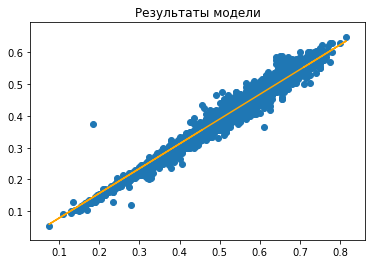

In [33]:
plt.title('Результаты модели');
plt.scatter(dataframe['length'], dataframe['diameter']);
plt.plot(dataframe['length'], k * dataframe['length'] + b, c='orange');

> Congratulations!!

Паззлы сошлись, наша прямая подошла к данным. Замечательнейшая библиотека `scikit-learn` имеет множество вариаций линейных моделей в арсенале. И мы рассмотрим модель `Ridge`. Она отличается тем, что *штрафует* модель за абсолютную величину коэффициентов.

Зачем? Чтобы уменьшить влияние выбросов. Выбросы - это редкие точки, которые сильно отличаются от поведения всех остальных. Часто при препроцессинге их просто удаляют из датасета.

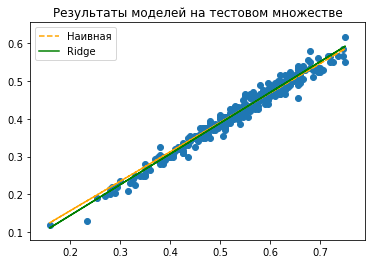

In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(
    alpha=0.1 # это тот самый штраф, чем он меньше, тем ниже значения коэффициентов
).fit(
    dataframe.length.values[train_indices].reshape(-1, 1),
    dataframe.diameter[train_indices].values
)

# а предскажем - на тестовом
ridge_predictions = ridge_model.predict(
    dataframe.length.values[test_indices].reshape(-1, 1)
)

plt.title('Результаты моделей на тестовом множестве');
plt.scatter(dataframe['length'].values[test_indices], dataframe['diameter'].values[test_indices]);
plt.plot(dataframe['length'].values[test_indices], k * dataframe['length'].values[test_indices] + b, ls='--', c='orange', label="Наивная");
plt.plot(dataframe['length'].values[test_indices], ridge_predictions, c='green', label="Ridge");
plt.legend(loc='best');

Как видим, модели отличаются. Давайте проверим метрику `R-квадрат` на отложенном тесте. Это самая распространенная метрика для задачи регрессии. Она всегда меньше либо равна единицы, чем ближе к единице - тем лучше предсказания модели совпадают с истинными значениями.

In [35]:
from sklearn.metrics import r2_score

print("Наивная модель на тестовом множестве %.3f, Ridge (там же): %.3f" % (
    r2_score(dataframe.diameter.values[test_indices], k * dataframe['length'].values[test_indices] + b),
    r2_score(dataframe.diameter.values[test_indices], ridge_predictions)
))

Наивная модель на тестовом множестве 0.972, Ridge (там же): 0.974


Как видим, качество отличается в третьем знаке после запятой. Нам тут сильно повезло с данными... :) А давайте посмотрим, как можно решить задачу классификации с помощью линейной модели.

Наша модель будет иметь вид

> `y = sigmoid (k1 * x1 + k2 * x2 + ... + km * xm + b)`

где *sigmoid*, это следующая функция

`sigmoid(x) = 1 / (1 + exp(-x))`.

Она всегда от 0 до 1 невключительно. Её можно интерпретировать как *вероятность* того, что пример с признаками `x` относится к классу 1 (а не 0). В `scikit-learn` модель заведена под названием `LogisticRegression` (это не регрессия, несмотря на название, а классификация).

Попробуем отличить мужские ракушки от женских таким образом.

In [36]:
male_female = dataframe[dataframe.sex != 'I'].copy() # все, кроме детей

random_indices = shuffle(range(len(male_female)), random_state=1)
train_indices = random_indices[:-300] # 300 точек - будет тест
test_indices = random_indices[-300:]

from sklearn.linear_model import LogisticRegression

# возьмем все признаки, кроме пола
features = list(male_female.columns)
features.remove('sex')
target = 'sex'

# True если женщина, False если мужщина
male_female['sex'] = male_female['sex'].apply(lambda sex: sex == 'F')

# создадим модель
logreg = LogisticRegression(random_state=1).fit(
    male_female[features].iloc[train_indices],
    male_female[target].iloc[train_indices]
)

from sklearn.metrics import accuracy_score # метрика - количество правильных ответов
print("Точность классификации на 300 тестовых примерах %.3f" % (
    accuracy_score(
        male_female[target].iloc[test_indices],
        logreg.predict(male_female[features].iloc[test_indices])
    )
))

Точность классификации на 300 тестовых примерах 0.563


Как видим, точность **очень низкая**, 0.5 - это сродни угадыванию. Угадывает чуть-чуть точнее, чем случайно. Это - пример плохой классификации. Но у нас же три пола! Попробуем предсказывать их все.

In [37]:
# для классификаторов, которые не могут из коробки в мультикласс, можно возпользоваться оберткой,
# которая сделает много классификаторов "один-против-всех", то есть отличать один класс от остальных

from sklearn.multiclass import OneVsRestClassifier

multi_data = dataframe.copy()

random_indices = shuffle(range(len(multi_data)), random_state=1)
train_indices = random_indices[:-300] # 300 точек - будет тест
test_indices = random_indices[-300:]

# возьмем все признаки, кроме пола
features = list(multi_data.columns)
features.remove('sex')
target = 'sex'

# 2 если ребенок, 1 если женщина, 0 если мужщина
multi_data['sex'] = multi_data['sex'].apply(lambda sex: {
    'M': 0,
    'F': 1,
    'I': 2
}[sex])

# создадим модель
logreg_multiclass = OneVsRestClassifier(LogisticRegression(random_state=1)).fit(
    multi_data[features].iloc[train_indices],
    multi_data[target].iloc[train_indices]
)

from sklearn.metrics import confusion_matrix 
print("Матрица несоответствий на тестовом множестве")
print(confusion_matrix(
    multi_data[target].iloc[test_indices],
    logreg_multiclass.predict(multi_data[features].iloc[test_indices])
))

Матрица несоответствий на тестовом множестве
[[72 22 24]
 [45 23 18]
 [13  5 78]]


Ошибок до сих пор очень много. Мы воспользуемся отдельной версией `LogisticRegressionCV`, которая сочетает в себе перебор параметров (штрафов на коэффициенты) и одновременно кросс-валидацию. Заодно уберем линейные размеры из данных, и оставим несколько их тех, что в граммах. Логично, чтобы не складывать миллиметры с граммами.

In [62]:
from sklearn.linear_model import LogisticRegressionCV

features_subset = ['whole weight', 'viscera weight']

logreg_multiclass = OneVsRestClassifier(
    LogisticRegressionCV(
        Cs=[
            np.power(10.0, index) for index in range(-5, 5)
        ], # варианты штрафов на коэффициенты
        cv=5, # валидация по 5 фолдам
        max_iter=5000
    )
).fit(
    multi_data[features_subset].iloc[train_indices],
    multi_data[target].iloc[train_indices]
)

from sklearn.metrics import confusion_matrix 
print("Матрица несоответствий на тестовом множестве")
print(confusion_matrix(
    multi_data[target].iloc[test_indices],
    logreg_multiclass.predict(multi_data[features_subset].iloc[test_indices])
))

Матрица несоответствий на тестовом множестве
[[51 38 29]
 [45 22 19]
 [19  4 73]]


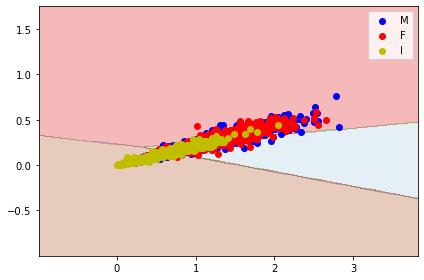

In [84]:
def plot_decisions(x, y, targets):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    z = logreg_multiclass.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    c = plt.contourf(xx, yy, z, cmap='Paired', alpha=0.3)
    
     # Plot the training points
    for index in range(3):
        indices = np.where(targets == index)
        plt.scatter(x[indices], y[indices], color=[
            'b', 'r', 'y'
        ][index], label={
            0: 'M', 1: 'F', 2: 'I'
        }[index])

    plt.legend()
    plt.tight_layout()
    plt.show()

plot_decisions(
    multi_data[features_subset[0]].values,
    multi_data[features_subset[1]].values,
    multi_data[target].values
)

### Небольшое заключение

Линейные модели далеко не всегда без подходящего `feature engineering` хорошо работают. А практически - никогда (без изменения признаков). В моделируемых процессах часто очень мало линейного. Далее у нас будет кое-что помощнее!